In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
from itertools import zip_longest

In [203]:
def get_llm_ratings(llm_rating_sources: list[str]) -> list[float]:
    """
    Get the average llm rating for a given source.
    Args:
        llm_rating_sources: list of llm rating sources. This is the dirname to start checking for csv files from.
                            Subdirectories will be checked starting from this directory.
    Return:
        List of all llm ratings for the given source.
        If multiple sources are given return the average rating across all sources.
    """
    all_source_ratings = []

    for source in llm_rating_sources:
        source = f"{os.path.dirname(os.path.abspath(os.getcwd()))}/../outputs/{source}"
        source_ratings = []
        
        # Traverse through the directory to find CSV files
        for root, _, files in os.walk(source):
            for file in files:
                if file.endswith(".csv"):
                    # Read the CSV file
                    file_path = os.path.join(root, file)
                    df = pd.read_csv(file_path)
                    
                    # Assuming the response column contains the dictionary of ratings as string
                    if 'response' in df.columns:
                        response = df['response'][0]

                        # Convert the response from string to a dictionary
                        response_dict = ast.literal_eval(response)
                        
                        # Extract ratings and append them to source_ratings
                        source_ratings = response_dict.values()
        
        if source_ratings:
            all_source_ratings.append(source_ratings)

    # Calculate average ratings
    zipped_lists = zip_longest(*all_source_ratings, fillvalue=None)
    llm_ratings = [
        sum(filter(None.__ne__, group)) / len(list(filter(None.__ne__, group)))
        for group in zipped_lists
    ]
    
    return llm_ratings

In [204]:
human_ratings = [
    5.565217391,
    5,
    4.826086957,
    5.739130435,
    5.52173913,
    6.826086957,
    7.304347826,
    5.434782609,
    6.391304348,
    7.47826087,
    7.043478261,
    5.869565217,
    6.739130435,
    6.956521739,
    6.47826087,
    5.956521739,
    4.652173913,
    4.260869565,
    5.173913043,
    4.086956522,
    4.173913043,
    4.304347826,
    5,
    4.043478261,
    4.217391304,
    4.434782609,
    5.347826087,
    6.217391304,
    5.434782609,
    4.782608696,
    6.173913043,
    5.956521739,
    6.47826087,
    5,
    4.739130435,
    5.173913043,
    6.304347826,
    6.434782609,
    5.260869565,
    5.304347826,
    5.956521739,
    4.304347826,
    5.260869565,
    4.391304348,
    4.956521739,
    5.695652174,
    5.043478261,
    5.826086957,
    5.043478261,
    4.913043478,
    5.217391304,
    6.217391304,
    6.391304348,
    6.52173913,
    7.217391304,
    6.565217391,
    5.52173913,
    4.347826087,
    3.869565217,
    7,
    7.565217391,
    6.52173913,
    6.260869565,
    6.043478261,
    4.913043478,
]

USE_HUMAN_RATINGS = len(human_ratings) > 0

In [205]:
llm_rating_sources = ["lehne_experiment\standard\creative"]

llm_ratings = get_llm_ratings(llm_rating_sources)

C:\Users\alrea\AppData\Local\Temp\ipykernel_2392\246057544.py:41: DeprecationWarning: NotImplemented should not be used in a boolean context
  sum(filter(None.__ne__, group)) / len(list(filter(None.__ne__, group)))


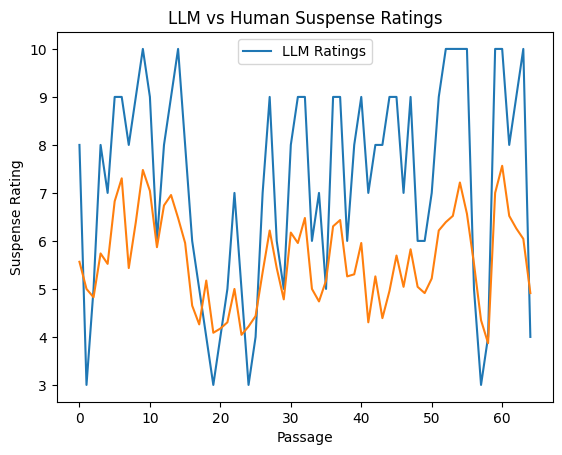

In [206]:
plt.plot(llm_ratings, label='LLM Ratings')

plt.title('LLM Suspense Ratings')
plt.xlabel('Passage')
plt.ylabel('Suspense Rating')
plt.legend()

if USE_HUMAN_RATINGS:
    plt.plot(human_ratings, label='Human Ratings')
    plt.title('LLM vs Human Suspense Ratings')

plt.show()

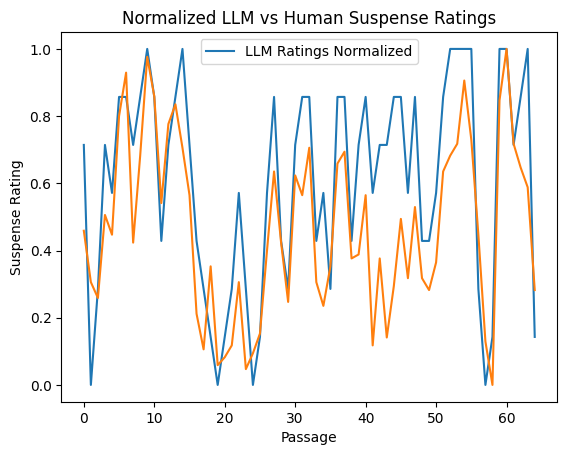

In [207]:
llm_ratings_norm = (np.array(llm_ratings) - np.min(llm_ratings)) / (np.max(llm_ratings) - np.min(llm_ratings))
plt.plot(llm_ratings_norm, label='LLM Ratings Normalized')

plt.title('Normalized LLM Suspense Ratings')
plt.xlabel('Passage')
plt.ylabel('Suspense Rating')
plt.legend()

if USE_HUMAN_RATINGS:
    human_ratings_norm = (np.array(human_ratings) - np.min(human_ratings)) / (np.max(human_ratings) - np.min(human_ratings))
    plt.plot(human_ratings_norm, label='Human Ratings Normalized')
    plt.title('Normalized LLM vs Human Suspense Ratings')
    
plt.show()

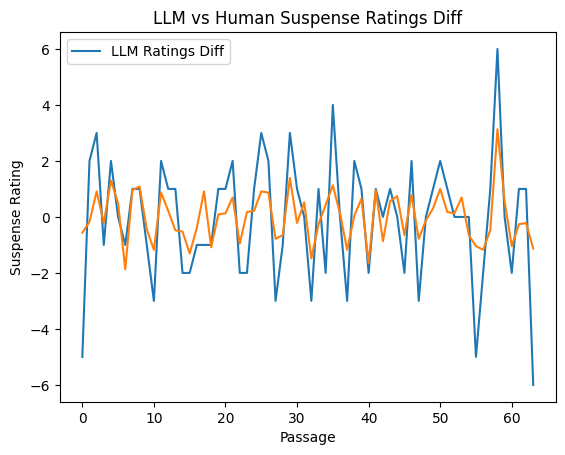

In [208]:
llm_ratings_diff = np.diff(llm_ratings)
plt.plot(llm_ratings_diff, label='LLM Ratings Diff')

plt.title('LLM Suspense Ratings Diff')
plt.xlabel('Passage')
plt.ylabel('Suspense Rating')
plt.legend()

if USE_HUMAN_RATINGS:
    human_ratings_diff = np.diff(human_ratings)
    plt.plot(human_ratings_diff, label='Human Ratings Diff')
    plt.title('LLM vs Human Suspense Ratings Diff')

plt.show()